# Numeri complessi
In python è possibile definire direttamente dei numeri complessi, utilizzando il costruttore `complex(real, img)`, che restituisce un dato composto (tipo particolare di coppia di numeri) che rappresenta il relativo numero immaginario: 

In [1]:
c = complex(1,2)

In [2]:
print(c, type(c))

(1+2j) <class 'complex'>


In [6]:
# oppure direttamente usando il carattere 'j' dopo un numero
c2 = 1-2j
print(c2, type(c2))

(1-2j) <class 'complex'>


È possibile ottenere il coniugato del numero:

In [4]:
print('coniugato: {}, parte reale: {}, parte immaginaria: {}'.format(c.conjugate(), c.real, c.imag))

coniugato: (1-2j), parte reale: 1.0, parte immaginaria: 2.0


Si noti che `conjugate()` è una funzione (che prende in modo implicito come argomento il numero stesso, con notazione dot.function()), mentre `real` e `imag` sono degli **attributi** (tipo particolari di **selettori**) del dato composto di tipo `complex`.

Inoltre sui numeri complessi sono stati ridefiniti tutti gli operatori aritmetici, il predicato di uguaglianza, e il calcolo del modulo:

In [7]:
a = 1+3j
b = -3 -5j
c = 1j
d = 2
print(a+b*c/d)
print(1==b)
print(abs(b))

(3.5+1.5j)
False
5.830951894845301


La documentazione di Python contiene la [lista completa di funzioni per i numeri complessi](https://docs.python.org/3.3/library/cmath.html).

Si consiglia di leggere anche la documentazione sulla [funzione "format" per le stringhe](https://pyformat.info/).

# Liste e Matrici
Una matrice rettangolare di $n$ righe e $m$ colonne può essere direttamente rappresentata in Python utilizzando delle liste di liste che contengono gli elementi della matrice. Per esempio, la matrice

$A = \left[ \begin{array}{ccc} 1 & 3 & 0 \\ -1 & 1 & 9 \\ -3 & 4 & 1 \end{array} \right]$

può essere rappresentata dalla lista di liste:

In [10]:
A = [[1,3,0], [-1,1,9], [-3,4,1]]

In [11]:
print(A)

[[1, 3, 0], [-1, 1, 9], [-3, 4, 1]]


In [12]:
# Accesso alla seconda riga
print(A[1])

[-1, 1, 9]


In [5]:
# Accesso al terzo elemento della seconda riga, ovvero elemento a(2,3)
print(A[1][2])

9


Un'implementazione efficiente della struttura dati "matrice" viene fornita dalla libreria [numpy](https://http://www.numpy.org/). Per il momento, basta sapere che con la struttura dati [numpy.matrix](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.matrix.html) è possibile definire un dato composto di tipo matrice nel modo seguente:

In [8]:
from numpy import matrix

In [15]:
B = matrix(A)

In [16]:
print(B)

[[ 1  3  0]
 [-1  1  9]
 [-3  4  1]]


In [17]:
# Provare a scrivere "B." e poi premere il tasto 'TAB'
#B.
B

matrix([[ 1,  3,  0],
        [-1,  1,  9],
        [-3,  4,  1]])

Oppure si può definire la matrice direttamente usando l'oggetto matrix:

In [18]:
C =matrix([[1, 2], [3, 4]])

In [12]:
print(C)

[[1 2]
 [3 4]]


Per una lista completa delle funzioni definite sulle matrice in numpy, consultare la [documentazione di matrix](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.matrix.html).

# Rappresentazione grafica di una matrice
Con la libreria [matplotlib](http://matplotlib.org/) è possibile rappresentare immagini in due dimensioni definite da matrici usando il comando [`imshow`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow).

Nel caso più semplice, la funzione prende in input una matrice di numeri, e se non viene specificato un valore per il parametro [cmap](https://matplotlib.org/tutorials/colors/colorbar_only.html), la funzione decide in automatico i colori da assegnare a ciascun numero contenuto nella matrice. 

Per vedere esempi di possibili ColorMap si rimanda a questo [tutorial](http://matplotlib.org/users/colormaps.html).

## La scacchiera
L'esempio più semplice di immagine che corrisponde ad una matrice è sicuramente una scacchiera, in cui possiamo assegnare un numero al bianco e un altro al nero.

Per esempio, il codice seguente crea un'immagine corrispondente ad una scacchiare 8x8, in cui ad ogni coppia di interi $(i,j)$ viene assegnato il valore 0, che viene "mappato" al nero, oppure il valore 1, che viene "mappato" al bianco. La mappatura al bianco e al nero viene determinata dal parametro `cmap=gray`.

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


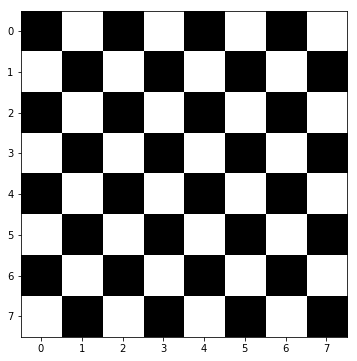

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def DrawChessBoard(n=8):
    # L'operatore '%' calcola il resto della divisione
    ChessBoard = np.matrix([[(i+(j%2))%2 for i in range(n)] for j in range(n)])
    print(ChessBoard)
    # Crea una figura, disegna l'immagine data dalla matrice, aggiungi la colorbar sulla destra
    fig = plt.figure(figsize=(6,6))
    # Uso la colormap 'gray' per avere la scacchiera in bianco&nero
    img = plt.imshow(ChessBoard, cmap='gray')
    plt.show()
    
DrawChessBoard(8)

## Un gradiente circolare
Per rendersi idea di come vengono gestiti i colori, si consideri il codice seguente, in cui per comodità si usa il piano complesso, e si fa corrispondere ad ogni elemento $a_{rc}$ di una matrice quadrata $n \times n$ il valore:

$$a_{rc} = \mid complex(r-n, c-n) \mid$$

in cui `complex(a,b)` è la primitiva di Python che crea il numero complesso $a+b\,i$ (i unità immaginaria).

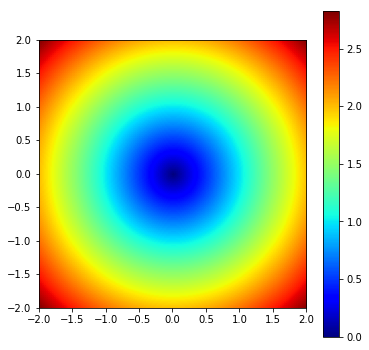

In [104]:
# Calcola il modulo del numero complesso
# che viene usato per stabilire il colore nell'immagine
def ComplexModulo(z):
    return abs(z)

# Costruisci una matrice n x n dove ciascun elemento
# corrisponde ad un pixel dell'immagine; il valore numerico
# dell'elemento ne determina il colore
def MakeImage(F, n, scale=0.01):
    data = [scale*i for i in range(-n,n)]
    return np.matrix([[F(complex(a, b)) for a in data] for b in data])

# Disegna l'immagine della matrice creata dalla funzione F(z) : Z -> R
def DrawImage(F, n, scale):
    # Restituisce una matrice n*n
    m = MakeImage(F, n, scale)
    # Crea una figura, disegna l'immagine data dalla matrice, aggiungi la colorbar sulla destra
    plt.figure(figsize=(6,6))
    img = plt.imshow(m, extent=(-scale*n, scale*n, -scale*n, scale*n), cmap='jet') # jet, gray,
    plt.colorbar()
    plt.show()

# Alcuni parametri
DrawImage(ComplexModulo, 200, 0.01)

**ESERCIZIO:** Provare ad usare diversi valori per la colormap, come indicato nel relativo [tutorial](http://matplotlib.org/users/colormaps.html).

## Un frattale semplice: il Julia Set
Usando le matrici, si può facilmente arrivare a rappresentare immagini frattali in 2D.

Prendiamo per esempio un semplice [insieme di Julia](https://en.wikipedia.org/wiki/Julia_set). Per darne una rappresentazione grafica, usiamo il piano complesso tramite una matrice come nell'esempio precedente, e per ogni punto del piano complesso $(r,c)$, corrispondente all'elemento $a_{(n-r)(n-c)}$ della matrice quadrata $n \times n$, controlliamo se la successione dei punti:

$$z_{k+1} = z_k^2 + c$$

converge in un numero finito di iterazioni, oppure diverge. La successione si considera divergere quando $\mid z_{k+1} \mid > 2$, mentre si considera a convergenza se dopo un numero massimo di iterazioni la condizione precedente non si è ancora verificata.

**ESERCIZIO 1:** Si completi la funzione `JuliaSetRec(z, c, k)` seguente in modo che controlli se la successione $z_{k+1} = z_k^2 + c$ sia convergente o meno; il parametro `z` corrisponde al numero complesso, `c` è la costante che appare nella successione, ` k` è il numero di ricorsione corrente. Se la successione converge la funzione ritorna il valore 0; se la successione diverge la funzione ritorna il numero di ricorsione `k` in cui si è dichiarata la successione come divergente. 

**Si implementi la funzione in maniera RICORSIVA.**

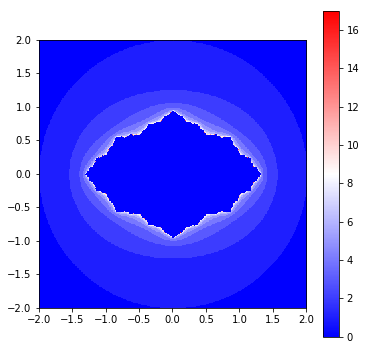

In [103]:
# Per informazioni di base sui Julia Set, vedere per esempio:
# https://en.wikipedia.org/wiki/Julia_set
def JuliaSetRec(z, c, k, max_k=64):
    if k > max_k:
        return 0
    if abs(z) > 2:
        return k
    return JuliaSetRec(z**2+c, c, k+1, max_k)
    
def JuliaSet(z, c=-0.413):
    cList = [-0.413, 0.258, (0.258+0.013j)]
    c = cList[0]
    return JuliaSetRec(z, c, 0)


plasma
# Alcuni parametri
DrawImage(JuliaSet, 200, 0.01)

**ESERCIZIO FACOLTATIVO 2:** Si implementi una funzione che disegni un frattale corrispondente all'[insieme di Mandelbrot](https://en.wikipedia.org/wiki/Mandelbrot_set#Computer_drawings).

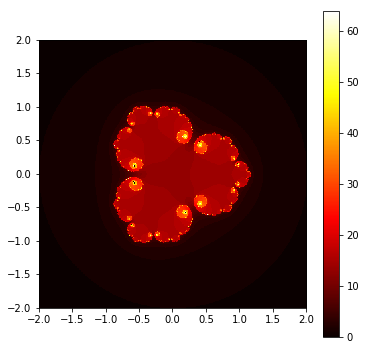

In [89]:
def MandelSetRec(z, d, c, k, max_k=64):
    if k > max_k:
        return 0
    if abs(z) > 2:
        return k
    return MandelSetRec(z**d+c, d, c, k+1, max_k)
    
def MandelSet(z, c=-0.413):
    cList = [-0.413, 0.258, (0.258+0.013j)]
    c = cList[0]
    return MandelSetRec(z, 3, c, 0)



# Alcuni parametri
DrawImage(MandelSet, 200, 0.01)

**ESERCIZIO FACOLTATIVO 3:** Si implementi una funzione che disegni un frattale di [Newton](https://en.wikipedia.org/wiki/Newton_fractal).

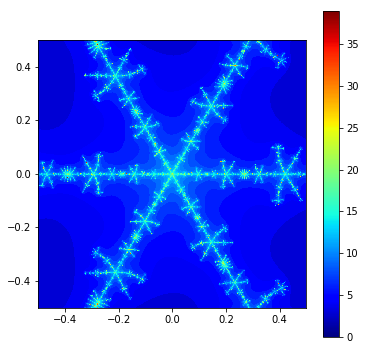

In [106]:
def NewtonSetRec(z, c, k, max_k=64):
    if k > max_k:
        return 0
    if abs(z) > 2:
        return k
    return NewtonSetRec(z**6+z**3-1, c, k+1, max_k)
    
def NewtonSet(z, c=-0.413):
    cList = [-0.413, 0.258, (0.258+0.013j)]
    c = cList[0]
    return NewtonSetRec(z, c, 0)



# Alcuni parametri
DrawImage(NewtonSet, 500, 0.001)